# Adaptive Filters

It is desired to come up with an FIR filter whose coefficients are adjusted on the fly in such a way as to minimize the power in the difference between the output of the filter with adapted coefficients and an unknown filter.  To do this, the adaptive filter monitors both the input (which goes to both filters) and the output of the unknown filter.  For the derivation, watch this [video](https://www.youtube.com/watch?v=wUV3n0GU0Og).   Here is an example octave script written at Virginia Tech by Sundar Sankaran and Louis Beex.

```%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                    %
%                LMS Algorithm                       %
%                                                    %
% Written By: Sundar Sankaran and A. A. (Louis) Beex %
%             DSP Research Laboratory                %
%             Dept. of Electrical and Comp. Engg     %
%             Virginia Tech                          %
%             Blacksburg VA 24061-0111               %
%                                                    %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%```

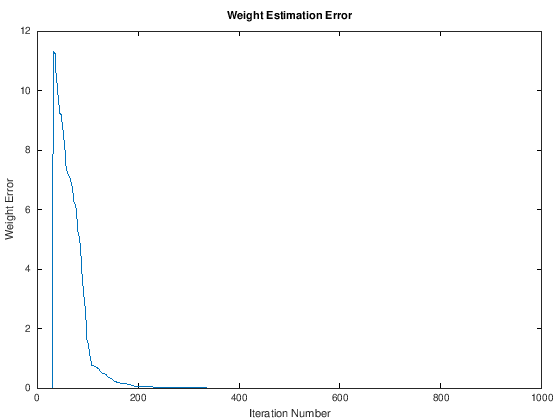

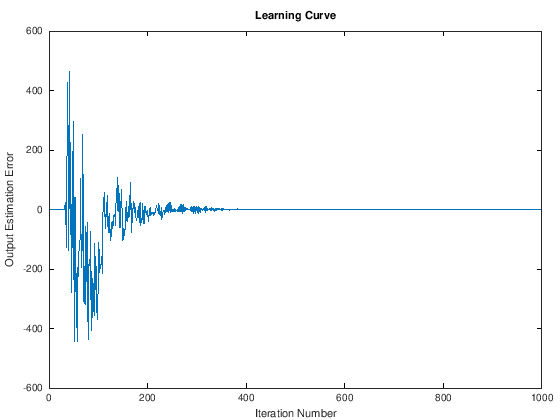

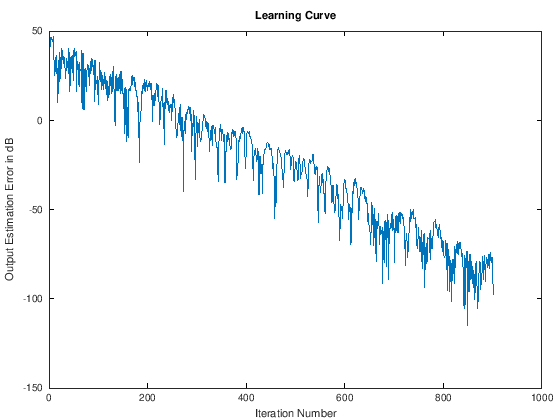

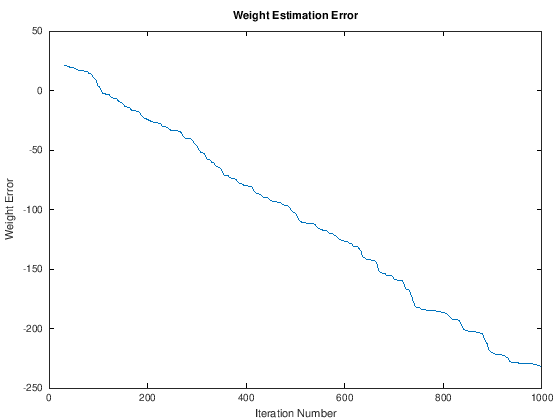

In [7]:
% Adaptive LMS FIR Filter Demo

randn('seed', 0) ;
rand('seed', 0) ;

NoOfData = 1000 ;       % Set no of data points used for training
Order = 32 ;            % Set the adaptive filter order

Mu = 0.3 ;             % Set the step-size constant

x = 100*randn(NoOfData, 1) ;% Input assumed to be white.  You can change the scale factor to test normalization.
h_unkn = rand(Order, 1) ;    % System picked randomly
r = filter(h_unkn, 1, x) ;   % Generate output (desired signal)

% Initialize LMS

h = zeros(Order,1) ;

% LMS Adaptation

for n = Order : NoOfData
        D = x(n:-1:n-Order+1) ;
        y(n) = h'*D ;
        e(n) = y(n) - r(n) ;
        h = h - 2*Mu*e(n)*D./(D'*D); %  Add this for normalization.   ./(D'*D) ;
        h_err(n) = (h_unkn - h)'*(h_unkn-h) ;
end ;

% Plot results

figure ;
plot(e) ;
title('Learning Curve') ;
xlabel('Iteration Number') ;
ylabel('Output Estimation Error') ;

figure ;
plot(20*log10(abs(e(100:NoOfData)))) ;
title('Learning Curve') ;
xlabel('Iteration Number') ;
ylabel('Output Estimation Error in dB') ;

figure ;
plot(h_err) ;
title('Weight Estimation Error') ;
xlabel('Iteration Number') ;
ylabel('Weight Error') ;

figure ;
plot(20*log10(h_err)) ;
title('Weight Estimation Error') ;
xlabel('Iteration Number') ;
ylabel('Weight Error') ;


Notice that the formula $$ \Delta h_n(k) = -2 \mu e(n) x(n-k) $$ scales up two orders of magnitude bigger if you make $x(k)$ an order of magnitude bigger, $\Delta h_n(k)$ gets bigger by two orders of magnitude, because $e(n)$ gets bigger with $x(k)$ and so does $x(k)$.  This is because both $e(n)$ and all the values of $x(n-k)$ both scale up by an order of magnitude.  That is like someone with control of the input changed our step size $\mu$ by two orders of magnitude, by increasing the loudness of the input by one order of magnitude.  This is likely to make our algorythm diverge.  So we need to normalize the algorithm by dividing by the size of the input $x(k)$ for $k \in \{0, 1, 2, ..., N-1\}$ somehow.  The best way to do that is to remember that $x(k)$ is a vector.  Let's just divide by its magnitude squared, $\vec x \cdot \vec x = \sum_{n=0}^{N-1} x^2(k)$.  In the code above, just add the the normalization as specified it the comment in the appropriate annoted place above.  Then you can try the script adding 10* to the place where $x(k)$ is generated, and see that it now makes no difference!  This algoritym is known as the normalized Least Mean Square (LMS) adaptive filter.  It approximately minimizes the mean square of the error signal, $e_n$.  The LMS adaptive filter is the basis for a lot of "learning" filters used in noise cancelation.

Adaptive filters are commonly used in speech compression.  It human speech, the vocal cords and vocal folds in the throat make a buzzing sound sawtooth like sound.  This sound is then filtered by the tongue and mouth cavity to produce speech.  The purpose of speech compression is to send speech with a much smaller number of bits than sending the actual waveforms making up the speech.  So an adaptive filter is made that mimics the filter of the tongue and mouth, and the sawtooth frequency and FIR filter coefficients are sent for each phoneme.  In the open source codec2 software, the sawtooth type wave in changed in time about every ten milliseconds, but the filter is changed only about every forty milliseconds.  The pitch frequency, the volume and the coefficients are then sent to the computer that wants to play the voice, and it uses the information to reconstruct the sounds that the human made at the beginning. There is a nice description of this on [SDR Academy 2018](https://www.youtube.com/embed/CLC4VWjHdfw?start=2480). 

There are many other applications of adaptive filters to echo cancellation, adaptive channel equalization, noise removal, positive feedback cancelation, etc.  For examples, and the block diagrams showing how the systems work, see [Applications of Adaptive Filtering, by Avalos, Sanchez and Velazquez](https://www.intechopen.com/books/adaptive-filtering-applications/applications-of-adaptive-filtering).